# Task 1: Extracting the following features from the Phishing URL Dataset


### **Extracting the top-level domain (TLD) from a given URL using the 'tld' library.**

### **The 'tld' library provides a simple and efficient way to parse and extract domain information.**

### **Ensure you have the library installed by running '!pip install tld' before using this code.**

In [ ]:
# Install necessary libraries if not already installed
!pip install tld
!pip install colorama
!pip install pandas
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103246 sha256=3f3f95e352c0858d4bc2c161e27dc08c41c9eaf4daf4180adc25879d5157b89a
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


### **Importing Librarires**

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from colorama import Fore  #Colorama is a module to color the python outputs

from urllib.parse import urlparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# Function to extract TLD from a URL
def extract_tld(url):
    try:
        return get_tld(url, as_object=True).fld
    except:
        return None

### **Loading Dataset**

In [ ]:
import pandas as pd
from tabulate import tabulate

'''
from google.colab import files
files.upload()
file = 'malicious_phish.csv'
'''

# Assuming the CSV file is in the specified path
file_path = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first 20 rows of the DataFrame
#print(data.head(20))

# Display the first 20 rows of the DataFrame with borders
# Display the first 20 rows of the DataFrame with manually controlled column width
data_truncated = data.head(20).apply(lambda x: x.str[:50])  # Truncate each column to 50 characters
print(tabulate(data_truncated, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════════════════════════════╤════════════╕
│    │ url                                                │ type       │
╞════╪════════════════════════════════════════════════════╪════════════╡
│  0 │ br-icloud.com.br                                   │ phishing   │
├────┼────────────────────────────────────────────────────┼────────────┤
│  1 │ mp3raid.com/music/krizz_kaliko.html                │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  2 │ bopsecrets.org/rexroth/cr/1.htm                    │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  3 │ http://www.garage-pirenne.be/index.php?option=com_ │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  4 │ http://adventure-nicaragua.net/index.php?option=co │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  5 │ http://buzzfil.net/m/show-art/ils-etaient-lo

In [ ]:
# Apply the extract_tld function to the 'url' column and create a new 'tld' column
data['tld'] = data['url'].apply(extract_tld)

# Display the first 10 rows of the DataFrame 'data' with the new 'tld' column
print(data.head(10))

                                                 url        type  \
0                                   br-icloud.com.br    phishing   
1                mp3raid.com/music/krizz_kaliko.html      benign   
2                    bopsecrets.org/rexroth/cr/1.htm      benign   
3  http://www.garage-pirenne.be/index.php?option=...  defacement   
4  http://adventure-nicaragua.net/index.php?optio...  defacement   
5  http://buzzfil.net/m/show-art/ils-etaient-loin...      benign   
6      espn.go.com/nba/player/_/id/3457/brandon-rush      benign   
7     yourbittorrent.com/?q=anthony-hamilton-soulife      benign   
8       http://www.pashminaonline.com/pure-pashminas  defacement   
9      allmusic.com/album/crazy-from-the-heat-r16990      benign   

                       tld  
0                     None  
1                     None  
2                     None  
3        garage-pirenne.be  
4  adventure-nicaragua.net  
5              buzzfil.net  
6                     None  
7                  

### **Meta information of Dataframe**

In [ ]:
#Providing the information about the dataset we are currently using
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
 2   tld     175910 non-null  object
dtypes: object(3)
memory usage: 14.9+ MB


### **Checking for Null Values**

In [ ]:
# Check for missing values in each column of the DataFrame and sum them up
data.isnull().sum()

url          0
type         0
tld     475281
dtype: int64

In [ ]:
# Count the occurrences of each unique value in the 'type' column and store the result in the 'count' variable
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
# Extracting the index of the 'count' Series, which represents categories or types
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

<ipython-input-35-e13863ea6258>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count, palette=custom_palette)


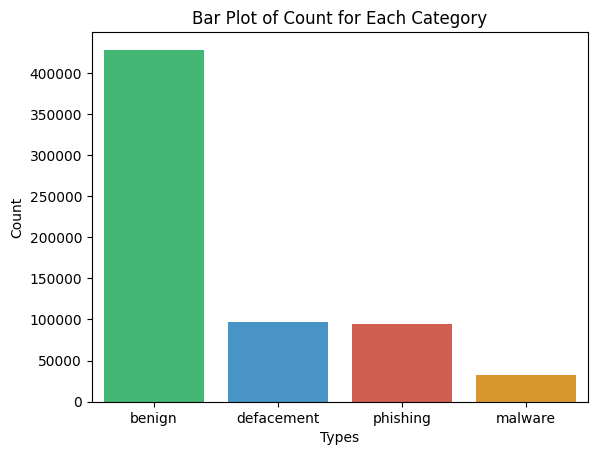

In [ ]:
# Custom color palette with bright colors
custom_palette = ["#2ecc71", "#3498db", "#e74c3c", "#f39c12"]

# Plotting the bar plot with different colors for each category
sns.barplot(x=count.index, y=count, palette=custom_palette)


# Adding labels to the plot
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Bar Plot of Count for Each Category')

# Display the plot
plt.show()

In [ ]:
# Remove 'www.' from the 'url' column using the replace method and a regular expression
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type,tld
0,br-icloud.com.br,phishing,None
1,mp3raid.com/music/krizz_kaliko.html,benign,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,None
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,None
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,None
651188,gamespot.com/xbox360/action/deadspace/,phishing,None
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,None


In [ ]:
# Display the first 10 rows of the DataFrame 'data'
data.head(10)

,url,type,tld
0,br-icloud.com.br,phishing,None
1,mp3raid.com/music/krizz_kaliko.html,benign,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,None
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,None
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,None
8,http://pashminaonline.com/pure-pashminas,defacement,pashminaonline.com
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,None


In [ ]:
# Creating a mapping dictionary for the 'Category' column, assigning numerical values to corresponding categories
rem = {"Category": {"benign": 0, "defacement": 1, "phishing": 2, "malware": 3}}

# Creating a new column 'Category' and replacing its values based on the mapping defined in the 'rem' dictionary
data['Category'] = data['type']

# Applying the replacement using the 'replace' method
data = data.replace(rem)

# Displaying the first 20 rows of the DataFrame with the updated 'Category' column
data.head(20)


,url,type,tld,Category
0,br-icloud.com.br,phishing,None,2
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,None,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,None,0
8,http://pashminaonline.com/pure-pashminas,defacement,pashminaonline.com,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,None,0


### **TFIDF Vectoriser**

In [ ]:
# Importing necessary libraries for TF-IDF vectorization
import pandas as pd
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', max_features=500)

# Applying TF-IDF vectorization to the 'url' column and converting it to a dense matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['url']).todense()

# Creating a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenating the TF-IDF DataFrame with the original dataset
data_with_tfidf = pd.concat([data, tfidf_df], axis=1)

# Displaying the first 10 rows of the DataFrame with TF-IDF features
print(data_with_tfidf.head(10))

#This line of code is used to display the same 10 url values in a tabulated format
print(tabulate(data_truncated.head(10), headers='keys', tablefmt='fancy_grid'))

                                                 url        type  \
0                                   br-icloud.com.br    phishing   
1                mp3raid.com/music/krizz_kaliko.html      benign   
2                    bopsecrets.org/rexroth/cr/1.htm      benign   
3  http://garage-pirenne.be/index.php?option=com_...  defacement   
4  http://adventure-nicaragua.net/index.php?optio...  defacement   
5  http://buzzfil.net/m/show-art/ils-etaient-loin...      benign   
6      espn.go.com/nba/player/_/id/3457/brandon-rush      benign   
7     yourbittorrent.com/?q=anthony-hamilton-soulife      benign   
8           http://pashminaonline.com/pure-pashminas  defacement   
9      allmusic.com/album/crazy-from-the-heat-r16990      benign   

                       tld  Category  000webhostapp   01   02   03   04   05  \
0                     None         2            0.0  0.0  0.0  0.0  0.0  0.0   
1                     None         0            0.0  0.0  0.0  0.0  0.0  0.0   
2          

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
from scipy.sparse import csr_matrix
from tabulate import tabulate  # Import the tabulate function

# Sample data (replace this with your actual data)
data_url = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'
df = pd.read_csv(data_url)

# Download the WordNet resource
nltk.download('wordnet')

# Instantiate WordNetLemmatizer
wnl = WordNetLemmatizer()

# Process only the first 10 URLs
batch_df = df.head(10).copy()

# Lemmatize the 'url' column
batch_df['lem_url'] = batch_df['url'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))

# Applying TF-IDF vectorization to the 'url' column
url_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', max_features=500)
url_tfidf_matrix = url_vectorizer.fit_transform(batch_df['url'])
url_tfidf_matrix = csr_matrix(url_tfidf_matrix)  # Convert to sparse matrix
url_tfidf_df = pd.DataFrame(url_tfidf_matrix.toarray(), columns=url_vectorizer.get_feature_names_out())

# Applying TF-IDF vectorization to the 'lem_url' column
word_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=1000)
lem_url_tfidf_matrix = word_vectorizer.fit_transform(batch_df['lem_url'])
lem_url_tfidf_matrix = csr_matrix(lem_url_tfidf_matrix)  # Convert to sparse matrix
lem_url_tfidf_df = pd.DataFrame(lem_url_tfidf_matrix.toarray(), columns=word_vectorizer.get_feature_names_out())
lem_url_tfidf_df[lem_url_tfidf_df > 0] = 1  # Convert non-zero values to 1

# Free up memory
del url_tfidf_matrix, lem_url_tfidf_matrix

# Concatenate the TF-IDF DataFrames with the original dataset
batch_df_with_tfidf = pd.concat([batch_df, url_tfidf_df, lem_url_tfidf_df], axis=1)

# Truncate each column to 20 characters
data_truncated = batch_df_with_tfidf.apply(lambda x: x.astype(str).str[:10])

# Display the resulting DataFrame using tabulate
print(tabulate(data_truncated, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════╤════════════╤════════════╤═════════╤══════════╤═════════╤═════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤══════════╤════════════╤═══════════╤══════════╤═══════════╤══════════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════════╤══════════════╤═════════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═════════════╤══════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤════════════╤══════════╤════════════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤═════════════╤══════════╤══════════╤══════════════════╤═════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤═════════╤════════════╤══════════╤══════════════════╤══════╤════════

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Whether a URL has an IP address or not**

In [ ]:
import re

def having_ip_address(url):
    # Regular expression to match different IP address formats (IPv4, IPv6, etc.)
    match = re.search(
        # IPv4 address with or without port
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
        # IPv4 address with hexadecimal representation
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        # IPv6 address
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        # IPv4 address with port
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        # IPv4 address with optional subnet mask
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)

    # If there is a match, return 1 (indicating the presence of an IP address), otherwise return 0
    if match:
        return 1
    else:
        return 0


In [ ]:
# Applying the 'having_ip_address' function to the 'url' column and creating a new 'having_ip_address' column
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [ ]:
# Display the first few rows of the DataFrame (default is 5 rows)
data.head()

,url,type,tld,Category,having_ip_address
0,br-icloud.com.br,phishing,None,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0


In [ ]:
# Display the counts of unique values in the 'having_ip_address' column
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

<ipython-input-45-aab03cc03a74>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<Axes: >

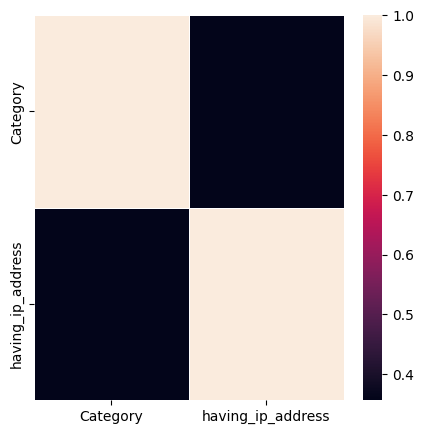

In [ ]:
# Create a heatmap of the correlation matrix for the DataFrame
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), linewidths=.5)


### **The number of dots in a URL. A URL with many dots is more likely to be a bad one.**

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['num_dots'] = data['url'].apply(lambda x: str(x).count('.'))

# Define a threshold for the number of dots
threshold_dots = 3  # Adjust this threshold as needed

# Create a new column 'is_bad_url' based on the number of dots threshold
data['is_bad_url'] = data['num_dots'] > threshold_dots

# Display the DataFrame
data.head()


,url,type,tld,Category,having_ip_address,num_dots,is_bad_url
0,br-icloud.com.br,phishing,None,2,0,2,False
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0,2,False
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0,2,False
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0,2,False
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0,2,False


### **The length of a URL. Long URLs are more likely to be bad ones.**

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

# Define a threshold for URL length
threshold_length = 90

# Create a new column 'is_bad_url' based on the length threshold
data['is_bad_url'] = data['url_len'] > threshold_length

# Display the DataFrame
data.head()


,url,type,tld,Category,having_ip_address,num_dots,is_bad_url,url_len
0,br-icloud.com.br,phishing,None,2,0,2,False,16
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0,2,False,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0,2,False,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0,2,False,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0,2,True,235


### **Age of the domain name, obtained using a WHOIS query. If the domain age is less than 1 year, the URL is bad with higher probability.**

In [ ]:
import pandas as pd
import whois
from datetime import datetime

# Assuming 'data' is your DataFrame
def calculate_domain_age(url):
    try:
        domain_info = whois.whois(url)
        if domain_info.creation_date is not None:
            creation_date = domain_info.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            current_date = datetime.now()
            age = (current_date - creation_date).days // 365
            return age
    except Exception as e:
        # Handle exceptions (e.g., if WHOIS information is not available)
        print(f"Error for {url}: {e}")
    return None

# Select the first 5 rows of the DataFrame
subset_data = data.head()

# Apply the function only to the first 5 URLs
subset_data['domain_age'] = subset_data['url'].apply(calculate_domain_age)

# Define a threshold for domain age in years
threshold_domain_age = 1

# Create a new column 'is_bad_url' based on the domain age threshold
subset_data['is_bad_url'] = subset_data['domain_age'] < threshold_domain_age

# Display the subset DataFrame
subset_data.head()


Error for http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0: No match for "ADVENTURE-NICARAGUA.NET".
>>> Last update of whois database: 2024-02-19T04:16:38Z <<<

NOTICE: The expiration date displayed in this record is the date the
registrar's sponsorship of the domain name registration in the registry is
currently set to expire. This date does not necessarily reflect the expiration
date of the domain name registrant's agreement with the sponsoring
registrar.  Users may consult the sponsoring registrar's Whois database to
view the registrar's reported date of expiration for this registration.

TERMS OF USE: You are not authorized to access or query our Whois
database through the use of electronic processes that are high-volume and
automated except as reasonably necessary to register domain names or
modif

<ipython-input-55-2bc46c0447ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['domain_age'] = subset_data['url'].apply(calculate_domain_age)
<ipython-input-55-2bc46c0447ed>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['is_bad_url'] = subset_data['domain_age'] < threshold_domain_age


,url,type,tld,Category,having_ip_address,num_dots,is_bad_url,url_len,domain_age
0,br-icloud.com.br,phishing,None,2,0,2,True,16,0.0
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0,2,False,35,24.0
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0,2,False,31,24.0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0,2,False,84,NaN
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0,2,False,235,NaN


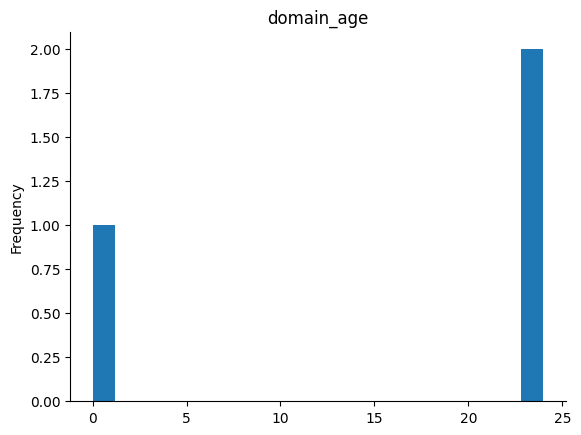

In [ ]:
# @title domain_age

from matplotlib import pyplot as plt
subset_data['domain_age'].plot(kind='hist', bins=20, title='domain_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Whether a URL has a redirection script. The redirection may direct users to bad websites.**

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Assuming 'data' is your DataFrame
def has_redirection_script(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Check for meta-refresh tag
        meta_refresh_tag = soup.find('meta', {'http-equiv': 'refresh'})

        # Check for JavaScript redirects
        has_js_redirect = 'window.location.replace' in response.text or 'window.location.href' in response.text

        return meta_refresh_tag is not None or has_js_redirect
    except Exception as e:
        # Handle exceptions (e.g., if the URL is unreachable)
        print(f"Error for {url}: {e}")
        return None

# Example usage for the first 5 URLs in the DataFrame
data['has_redirection_script'] = data['url'].head().apply(has_redirection_script)

# Display the DataFrame
data.head()


Error for br-icloud.com.br: Invalid URL 'br-icloud.com.br': No scheme supplied. Perhaps you meant https://br-icloud.com.br?
Error for mp3raid.com/music/krizz_kaliko.html: Invalid URL 'mp3raid.com/music/krizz_kaliko.html': No scheme supplied. Perhaps you meant https://mp3raid.com/music/krizz_kaliko.html?
Error for bopsecrets.org/rexroth/cr/1.htm: Invalid URL 'bopsecrets.org/rexroth/cr/1.htm': No scheme supplied. Perhaps you meant https://bopsecrets.org/rexroth/cr/1.htm?
Error for http://garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15: HTTPConnectionPool(host='garage-pirenne.be', port=80): Max retries exceeded with url: /index.php?option=com_content&view=article&id=70&vsig70_0=15 (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7a578b130370>: Failed to resolve 'garage-pirenne.be' ([Errno -2] Name or service not known)"))
Error for http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVy

,url,type,tld,Category,having_ip_address,num_dots,is_bad_url,url_len,has_redirection_script
0,br-icloud.com.br,phishing,None,2,0,2,False,16,None
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0,2,False,35,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0,2,False,31,None
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0,2,False,84,None
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0,2,True,235,None


### **Whether a URL contains javascript**

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

# Assuming 'data' is your DataFrame
def contains_javascript(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Check for JavaScript code in the HTML
        js_code_pattern = re.compile(r'<script[\s\S]*?>[\s\S]*?</script>')
        js_code_matches = soup.find_all('script', {'src': False, 'type': True, 'language': True})

        return bool(js_code_matches)
    except Exception as e:
        # Handle exceptions (e.g., if the URL is unreachable)
        print(f"Error for {url}: {e}")
        return None

# Example usage for the first 5 URLs in the DataFrame
data['contains_javascript'] = data['url'].head().apply(contains_javascript)

# Display the DataFrame
data.head()

Error for br-icloud.com.br: Invalid URL 'br-icloud.com.br': No scheme supplied. Perhaps you meant https://br-icloud.com.br?
Error for mp3raid.com/music/krizz_kaliko.html: Invalid URL 'mp3raid.com/music/krizz_kaliko.html': No scheme supplied. Perhaps you meant https://mp3raid.com/music/krizz_kaliko.html?
Error for bopsecrets.org/rexroth/cr/1.htm: Invalid URL 'bopsecrets.org/rexroth/cr/1.htm': No scheme supplied. Perhaps you meant https://bopsecrets.org/rexroth/cr/1.htm?
Error for http://garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15: HTTPConnectionPool(host='garage-pirenne.be', port=80): Max retries exceeded with url: /index.php?option=com_content&view=article&id=70&vsig70_0=15 (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7a564ab00790>: Failed to resolve 'garage-pirenne.be' ([Errno -2] Name or service not known)"))
Error for http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVy

,url,type,tld,Category,having_ip_address,num_dots,is_bad_url,url_len,has_redirection_script,contains_javascript
0,br-icloud.com.br,phishing,None,2,0,2,False,16,None,None
1,mp3raid.com/music/krizz_kaliko.html,benign,None,0,0,2,False,35,None,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,None,0,0,2,False,31,None,None
3,http://garage-pirenne.be/index.php?option=com_...,defacement,garage-pirenne.be,1,0,2,False,84,None,None
4,http://adventure-nicaragua.net/index.php?optio...,defacement,adventure-nicaragua.net,1,0,2,True,235,None,None
